# Banking sector:-

# Problem statement:-

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Importing the data:-

In [2]:
df=pd.read_csv(r'C:\Users\arshiyasamreen\Downloads\30th Jan Data Analysis Hacakthon Problem Statement and Dataset\Data.csv',index_col=0,header=[2])

In [3]:
df

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
customerid,,,,,,,,,,,,,,,,,,
1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45208,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45209,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes


# Understanding the data:-

In [4]:
df1=df.copy() ## copying the data so that our orginal data does not changes.

In [5]:
df1

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
customerid,,,,,,,,,,,,,,,,,,
1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45208,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45209,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes


In [6]:
df1.columns

Index(['age', 'salary', 'balance', 'marital', 'jobedu', 'targeted', 'default',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

In [7]:
df1.info() ## we can see here there are many numm values and wrong data types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 1 to 45211
Data columns (total 18 columns):
age         45191 non-null float64
salary      45211 non-null object
balance     45211 non-null int64
marital     45211 non-null object
jobedu      45211 non-null object
targeted    45211 non-null object
default     45211 non-null object
housing     45211 non-null object
loan        45211 non-null object
contact     45211 non-null object
day         45211 non-null int64
month       45161 non-null object
duration    45211 non-null object
campaign    45211 non-null int64
pdays       45211 non-null int64
previous    45211 non-null int64
poutcome    45211 non-null object
response    45181 non-null object
dtypes: float64(1), int64(5), object(12)
memory usage: 6.6+ MB


In [8]:
df1.shape

(45211, 18)

In [9]:
## age is in string and it have null values so we are replace null values with mean of age and converting it into int
a=round(df1['age'].mean()) 
df1['age'].replace([np.nan],a,inplace=True)
df1['age']=df1['age'].apply(int)
df1['age'].isnull().sum()

0

In [10]:
## salary is in categorical data beacause we have ? in the salary so we replace ? with nan and then fill the nan with mean of salary and then we are converting it into numerical data
df1['salary'].replace(['?'],np.nan,inplace=True)
df1['salary']=df1['salary'].apply(pd.to_numeric)
a=df1['salary'].mean()
df1['salary'].replace(np.nan,a,inplace=True)
df1['salary'].isnull().sum()

0

In [11]:
## in the given dataset balance is in categorical data so we are converting it into numerical data
df1['balance']=df1['balance'].apply(pd.to_numeric)
df1['balance'].unique()

array([ 2143,    29,     2, ...,  8205, 14204, 16353], dtype=int64)

In [12]:
df1['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [13]:
df1['jobedu'].unique()

array(['management,tertiary', 'technician,secondary',
       'entrepreneur,secondary', 'blue-collar,unknown', 'unknown,unknown',
       'entrepreneur,tertiary', 'retired,primary', 'admin.,secondary',
       'technician,unknown', 'services,secondary', 'admin.,unknown',
       'blue-collar,primary', 'blue-collar,secondary',
       'management,secondary', 'retired,secondary', 'retired,unknown',
       'admin.,primary', 'self-employed,tertiary', 'services,primary',
       'admin.,tertiary', 'retired,tertiary', 'technician,tertiary',
       'self-employed,primary', 'technician,primary',
       'management,unknown', 'unemployed,tertiary', 'services,unknown',
       'housemaid,primary', 'self-employed,secondary',
       'unemployed,secondary', 'student,secondary',
       'entrepreneur,unknown', 'services,tertiary', 'student,unknown',
       'unemployed,unknown', 'entrepreneur,primary', 'student,tertiary',
       'self-employed,unknown', 'unemployed,primary',
       'management,primary', 'blue

In [14]:
## in the given dataset jobedu contains education and job both data so we are splitting both into different columns .
df1['job']=df1['jobedu'].str.split(',',expand=True)[0]
df1['education']=df1['jobedu'].str.split(',',expand=True)[1]
df1.drop('jobedu',axis=1,inplace=True)

In [15]:
df1['targeted'].unique()

array(['yes', 'no'], dtype=object)

In [16]:
df1['default'].unique()

array(['no', 'yes'], dtype=object)

In [17]:
df1['housing'].unique()

array(['yes', 'no'], dtype=object)

In [18]:
df1['loan'].unique()

array(['no', 'yes'], dtype=object)

In [19]:
df1['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [20]:
## in the given dataset day is in categorical type so we are converting it into numerical data
df1['day']=df1['day'].apply(pd.to_numeric)

In [21]:
df1['day'].unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31],
      dtype=int64)

In [22]:
## in one column we have two different types of data that is month and year so we are splitting them into two different columns so that our dataset looks neat and clean
df1['month'].unique()

array(['may, 2017', nan, 'jun, 2017', 'jul, 2017', 'aug, 2017',
       'oct, 2017', 'nov, 2017', 'dec, 2017', 'jan, 2017', 'feb, 2017',
       'mar, 2017', 'apr, 2017', 'sep, 2017'], dtype=object)

In [23]:
df1['year']=df1['month'].str.split(',',expand=True)[1]
df1['month']=df1['month'].str.split(',',expand=True)[0]

In [24]:
x=df1['year'].mode()
df1['year'].replace([np.nan],x,inplace=True)
df1['year']=df1['year'].apply(pd.to_numeric)
df1['year'].isnull().sum()

0

In [25]:
x=df1['month'].mode()
df1['month'].replace([np.nan],x,inplace=True)
df1['month'].isnull().sum()

0

In [26]:
## in duartion we have two diffrent data that is it is in seconds and in minutes so we are splitting it and converting minutes to seconds.
duration_sec = []
for i in df1['duration']:
        if 'min' in i:
            m = i.split(' ')
            m = float(m[0])*60
            duration_sec.append(m)
        else:
            a = i.split(' ')
            duration_sec.append(a[0])
     
     
df1['duration']=duration_sec

In [27]:
## we are changing the data type of duration from categorical to numeric.
df1['duration']=df1['duration'].apply(float)
df1['duration'].unique()

array([ 261.,  151.,   76., ..., 1246., 1556.,  977.])

In [28]:
## we are changing the datatype of compaign categorical to numerical data
df1['campaign']=df1['campaign'].apply(pd.to_numeric)

In [29]:
df1['campaign'].unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44],
      dtype=int64)

In [30]:
## we are converting the pdays columnfrom categorical to numerical as it contains only numerical data in that column
df1['pdays']=df1['pdays'].apply(pd.to_numeric)

In [31]:
df1['pdays'].unique()

array([ -1, 151, 166,  91,  86, 143, 147,  89, 140, 176, 101, 174, 170,
       167, 195, 165, 129, 188, 196, 172, 118, 119, 104, 171, 117, 164,
       132, 131, 123, 159, 186, 111, 115, 116, 173, 178, 110, 152,  96,
       103, 150, 175, 193, 181, 185, 154, 145, 138, 126, 180, 109, 158,
       168,  97, 182, 127, 130, 194, 125, 105, 102,  26, 179,  28, 183,
       155, 112, 120, 137, 124, 187, 190, 113, 162, 134, 169, 189,   8,
       144, 191, 184, 177,   5,  99, 133,  93,  92,  10, 100, 156, 198,
       106, 153, 146, 128,   7, 121, 160, 107,  90,  27, 197, 136, 139,
       122, 157, 149, 135,  30, 114,  98, 192, 163,  34,  95, 141,  31,
       199,  94, 108,  29, 268, 247, 253, 226, 244, 239, 245, 204, 231,
       238, 258, 230, 254, 265,  71, 223, 246, 250, 266, 240, 205, 261,
       259, 241, 260, 234, 251, 225, 161, 237, 262, 248, 255, 220, 227,
       206, 224, 249, 235, 228, 263,   2, 270, 232, 252, 207, 200, 269,
       233, 256, 273, 272, 242, 264, 208, 214, 222, 271, 203, 22

In [32]:
## as 'previous' columns contain only numerical data so we are converting from categorical to numerical data
df1['previous']=df1['previous'].apply(pd.to_numeric)

In [33]:
df1['previous'].unique()

array([  0,   3,   1,   4,   2,  11,  16,   6,   5,  10,  12,   7,  18,
         9,  21,   8,  14,  15,  26,  37,  13,  25,  20,  27,  17,  23,
        38,  29,  24,  51, 275,  22,  19,  30,  58,  28,  32,  40,  55,
        35,  41], dtype=int64)

In [34]:
df1['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [35]:
### as response is a categorical data so we are using mode to replace it null values
x=df1['response'].mode()
df1['response'].replace([np.nan],x,inplace=True)
df1['response'].isnull().sum()

0

# Cleaned Data:-

In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 1 to 45211
Data columns (total 20 columns):
age          45211 non-null int64
salary       45211 non-null float64
balance      45211 non-null int64
marital      45211 non-null object
targeted     45211 non-null object
default      45211 non-null object
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null float64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
response     45211 non-null object
job          45211 non-null object
education    45211 non-null object
year         45211 non-null int64
dtypes: float64(2), int64(7), object(11)
memory usage: 7.2+ MB


In [ ]:
df1.to_csv('Arshiya',index=False)

# Data Visualisation:-

In [37]:
df1.describe()

,age,salary,balance,day,duration,campaign,pdays,previous,year
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.0
mean,40.935679,57084.453698,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,2017.0
std,10.616849,32016.099611,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.0
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,2017.0
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,2017.0
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,2017.0
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,2017.0
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,2017.0


## plots:-

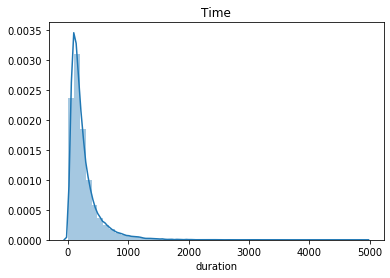

In [60]:
# univariate numerical data:-
sns.distplot(df1['duration'])
plt.title('Time')
plt.show() 

**maximum call durations are between 0 to 1000**

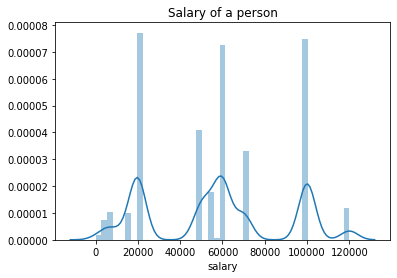

In [59]:
sns.distplot(df1['salary'])
plt.title('Salary of a person')
plt.show()      

**They are no outliers in salary**

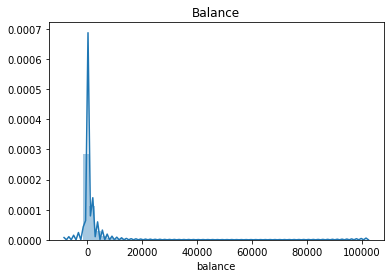

In [61]:
sns.distplot(df1['balance'])
plt.title('Balance')
plt.show()

**Balance is between 0 to 20000 and few balance is minus(-)  as we can seen in above fig it is below 0**

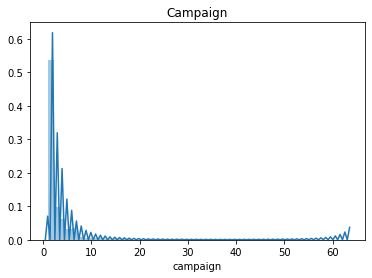

In [62]:
sns.distplot(df1['campaign'])
plt.title('Campaign')
plt.show()

**maximum number of contacts made to the client in this campaign is in between 0 to 10**

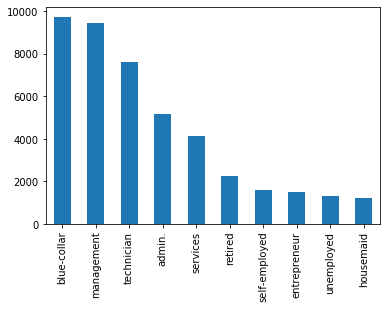

In [48]:
# univariate categorical data:-
df1['job'].value_counts().head(10).plot.bar()

**maximum contacts made to the client are belongs to blue collar**

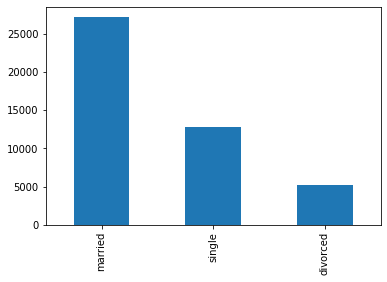

In [49]:
df1['marital'].value_counts().head(10).plot.bar()

**most of the client are married**

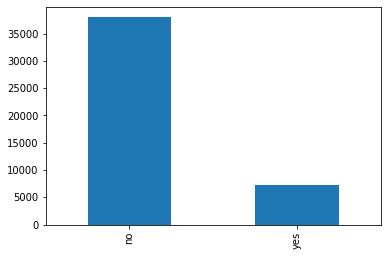

In [58]:
df1['loan'].value_counts().plot.bar()

**Above 35000 clients do not took loan**

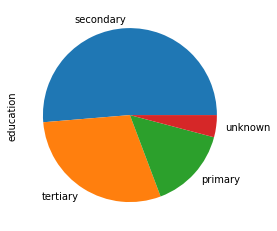

In [63]:
df1['education'].value_counts(normalize=True)
df1['education'].value_counts(normalize=True).plot.pie()
plt.show()

**most of the clients are secondary dataset**

# Bivariate:-

numerical - numerical data

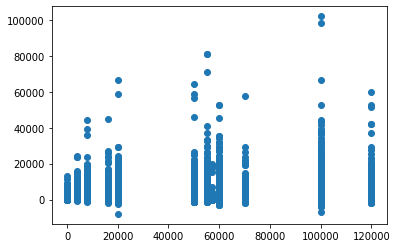

In [66]:
plt.scatter(df1['salary'],df['balance'])
plt.show()

**they are few outliers**

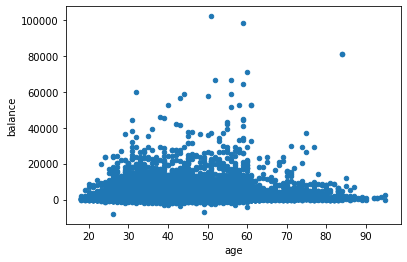

In [67]:
df1.plot.scatter(x="age",y="balance")
plt.show()

**they are few outliers** 

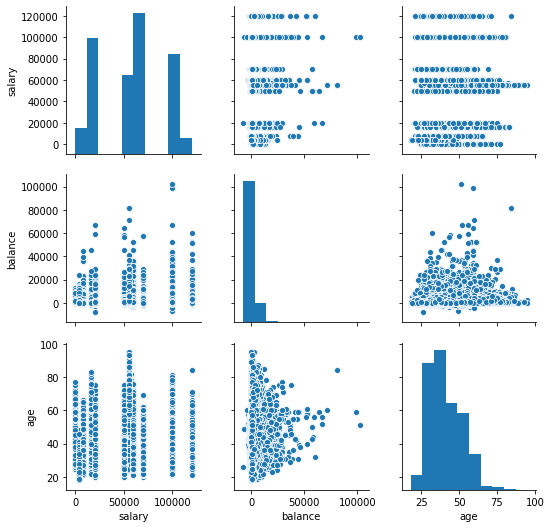

In [69]:
sns.pairplot(data = df1, vars=['salary','balance','age'])
plt.show()

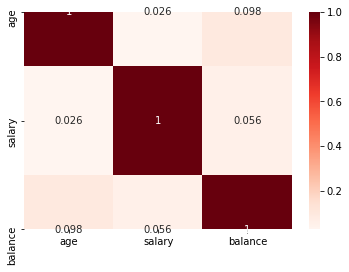

In [71]:
df1[['age','salary','balance']].corr()
sns.heatmap(df1[['age','salary','balance']].corr(), annot=True, cmap = 'Reds')
plt.show()

**salary and age are less correlated**

Numerical-Categorical:-

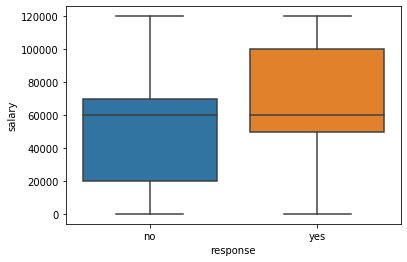

In [73]:
sns.boxplot(df1['response'], df1['salary'])
plt.show()

**The IQR for customers who gave a positive response is on the higher salary side**

categorical-categorical:-

In [74]:
df1['response_rate'] = np.where(df1['response']=='yes',1,0)
df1['response_rate'].value_counts()

0    39924
1     5287
Name: response_rate, dtype: int64

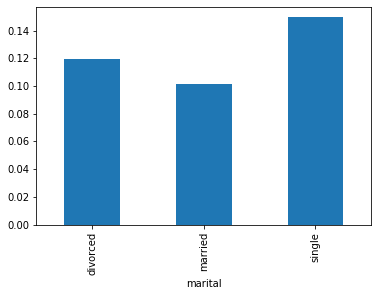

In [75]:
df1.groupby('marital')['response_rate'].mean().plot.bar()
plt.show()

**we can infer that the positive response is more for Single status members in the data set.**

# Time plot

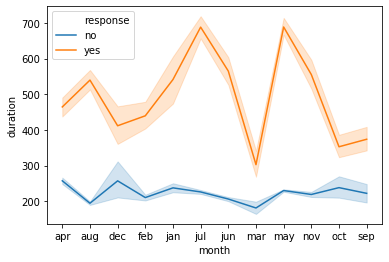

In [88]:
sns.lineplot(x='month',y='duration',data=df1,hue='response')
plt.show()

***The Call Duration of the clients who accepted offer is more compared to who declined***